<a href="https://colab.research.google.com/github/luizchenriq/alura_imersao_dados_4/blob/main/Alura_Imersao_dados_4_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 2 - Tratamento de dados e primeiros gráficos

In [2]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [5]:
dados["Valor"][0]

'R$ 7.000.000'

In [6]:
dados["Valor"][0].split()

['R$', '7.000.000']

In [9]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7310,Rua Florindo Braglia,Jardim São Paulo(Zona Norte),São Paulo,235,4,4,3,R$ 1.200.000
7500,Rua Cornélio Procópio,Saúde,São Paulo,165,2,2,2,R$ 899.000
2728,NaN,Pacaembu,São Paulo,890,4,7,7,R$ 4.600.000
9545,Rua Brazópolis,Jardim Jaú (Zona Leste),São Paulo,184,2,1,2,R$ 450.000
2110,NaN,Granja Julieta,São Paulo,550,4,6,6,R$ 4.950.000
1224,Rua Ourânia,Vila Madalena,São Paulo,591,4,7,5,R$ 20.000\n /Mês
2561,Avenida Diógenes Ribeiro de Lima,Alto de Pinheiros,São Paulo,190,3,3,5,R$ 10.000\n /Mês
9101,"Rua Martins, 386",Butantã,São Paulo,290,3,1,5,R$ 1.350.000
4802,Rua Sampaio Vidal,Jardim Paulistano,São Paulo,200,3,4,6,R$ 5.500.000
7195,Rua Antônio de Andrade Rebelo,Retiro Morumbi,São Paulo,850,4,8,8,R$ 35.000\n /Mês


In [11]:
dados["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [12]:
dados["Valor"].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [13]:
dados["Valor"].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [14]:
len(dados["Valor"].str.split(expand = True)[1].unique())

1038

In [15]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [16]:
dados[["Moeda","Valor","Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000,R$,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000,R$,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000,R$,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000,R$,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000,R$,None


In [17]:
dados["Tipo_anuncio"].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo_anuncio, Length: 10008, dtype: bool

In [20]:
dados[["Tipo_anuncio"]]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [21]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000,R$,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000,R$,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000,R$,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000,R$,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000,R$,None
...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1.500.000,R$,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665.000,R$,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2.300.000,R$,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1.050.000,R$,None


In [22]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rua           6107 non-null   object
 1   Bairro        9146 non-null   object
 2   Cidade        9156 non-null   object
 3   Metragem      9156 non-null   int64 
 4   Quartos       9156 non-null   int64 
 5   Banheiros     9156 non-null   int64 
 6   Vagas         9156 non-null   int64 
 7   Valor         9156 non-null   object
 8   Moeda         9156 non-null   object
 9   Tipo_anuncio  0 non-null      object
dtypes: int64(4), object(6)
memory usage: 786.8+ KB


In [24]:
dados_vendas["Valor"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor, Length: 9156, dtype: float64

In [26]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Tipo_anuncio         0 non-null      object 
 10  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


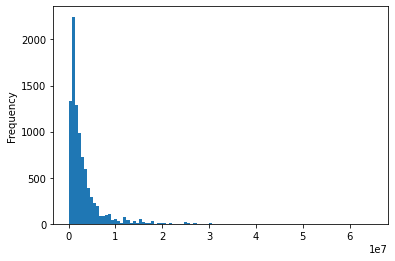

In [31]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 100)

In [37]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [40]:
dados_vendas[["Rua","Bairro","Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


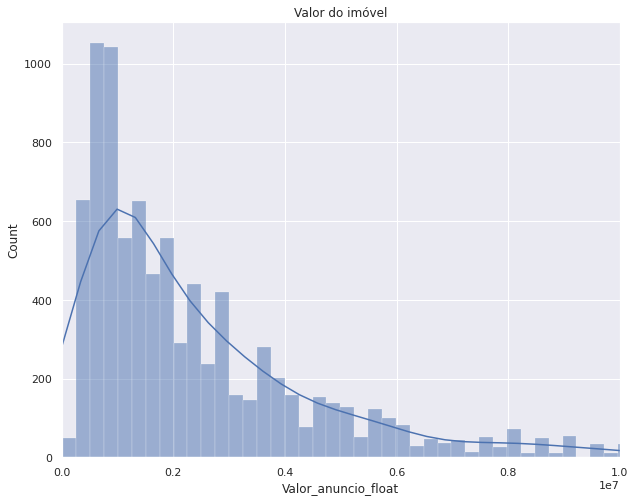

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data = dados_vendas, x =  "Valor_anuncio_float", kde = True)
ax.set_title("Valor do imóvel")
plt.xlim(-50, 10000000)
plt.show()

#Desafio Aula 2

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers

